### Understanding RNN

In [1]:
from tensorflow.keras.layers import SimpleRNN

SimpleRNN processes batches of sequences, like all other Keras layers, not just a single sequence. This means that it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps, input_features).

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes:

it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features));
it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). These two modes are controlled by the return_sequences constructor argument.
Let's take a look at an example per each type. This one returns only the last output for each input sequence:

Let's take a look at an example per each type. This one returns only the last output for each input sequence:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


while this returns the full sequences of successive outputs for each timestep:

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all intermediate layers to return full sequences:

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer:

In [6]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 40s 236ms/step - loss: 0.6396 - acc: 0.6212 - val_loss: 0.5614 - val_acc: 0.7100
Epoch 2/10
157/157 [==============================] - 37s 238ms/step - loss: 0.4190 - acc: 0.8187 - val_loss: 0.4088 - val_acc: 0.8254
Epoch 3/10
157/157 [==============================] - 33s 213ms/step - loss: 0.2909 - acc: 0.8852 - val_loss: 0.3788 - val_acc: 0.8478
Epoch 4/10
157/157 [==============================] - 37s 236ms/step - loss: 0.2197 - acc: 0.9156 - val_loss: 0.3614 - val_acc: 0.8628
Epoch 5/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1595 - acc: 0.9417 - val_loss: 0.4056 - val_acc: 0.8412
Epoch 6/10
157/157 [==============================] - 31s 195ms/step - loss: 0.1119 - acc: 0.9617 - val_loss: 0.4956 - val_acc: 0.8174
Epoch 7/10
157/157 [==============================] - 28s 180ms/step - loss: 0.0760 - acc: 0.9755 - val_loss: 0.5176 - val_acc: 0.8156
Epoch 8/10
157/157 [==============================] - 2

Let's plot the validation loss and accuracy:

In [7]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

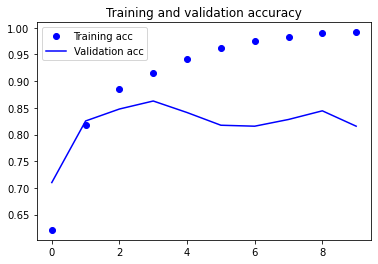

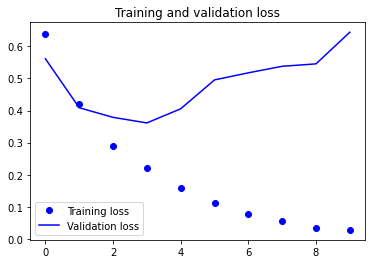

In [8]:
plot_loss_accuracy(history)

This dataset got us to 81% test accuracy. Unfortunately, small recurrent network doesn't perform very well at all compared to this baseline (only up to 81% validation accuracy). Part of the problem is that our inputs only consider the first 500 words rather the full sequences -- hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that SimpleRNN isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better.

Let's take a look at some more advanced layers.

### LSTM: a concrete example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. The network is similar to the one with SimpleRNN, and we only specify the output dimensionality of the LSTM layer,

In [9]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 101s 612ms/step - loss: 0.4929 - acc: 0.7654 - val_loss: 0.3764 - val_acc: 0.8468
Epoch 2/10
157/157 [==============================] - 93s 595ms/step - loss: 0.2905 - acc: 0.8856 - val_loss: 0.3161 - val_acc: 0.8640
Epoch 3/10
157/157 [==============================] - 87s 557ms/step - loss: 0.2313 - acc: 0.9108 - val_loss: 0.3146 - val_acc: 0.8818
Epoch 4/10
157/157 [==============================] - 92s 587ms/step - loss: 0.2023 - acc: 0.9258 - val_loss: 0.3041 - val_acc: 0.8848
Epoch 5/10
157/157 [==============================] - 92s 585ms/step - loss: 0.1737 - acc: 0.9374 - val_loss: 0.3280 - val_acc: 0.8852
Epoch 6/10
157/157 [==============================] - 88s 563ms/step - loss: 0.1557 - acc: 0.9435 - val_loss: 0.3393 - val_acc: 0.8630
Epoch 7/10
157/157 [==============================] - 89s 571ms/step - loss: 0.1392 - acc: 0.9503 - val_loss: 0.3313 - val_acc: 0.8586
Epoch 8/10
157/157 [==============================] - 

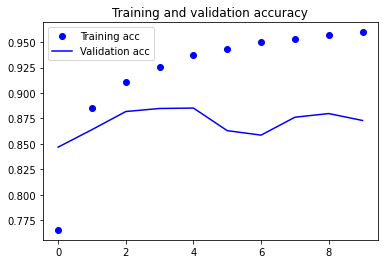

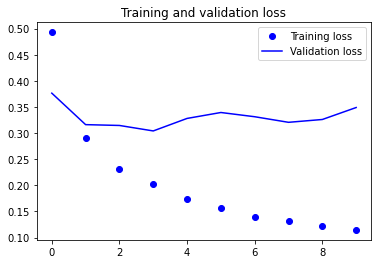

In [10]:
plot_loss_accuracy(history)

With this approach we achieved up to 87% accuracy, which is not bad. It's certainly much better than the previous SimpleRNN approach.

1. LSTM suffers much less from the gradient vanishing problem
2. We made no effort in tuning hyperparameters such embedding dimensionality or LSTM output dimensionality;
